# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

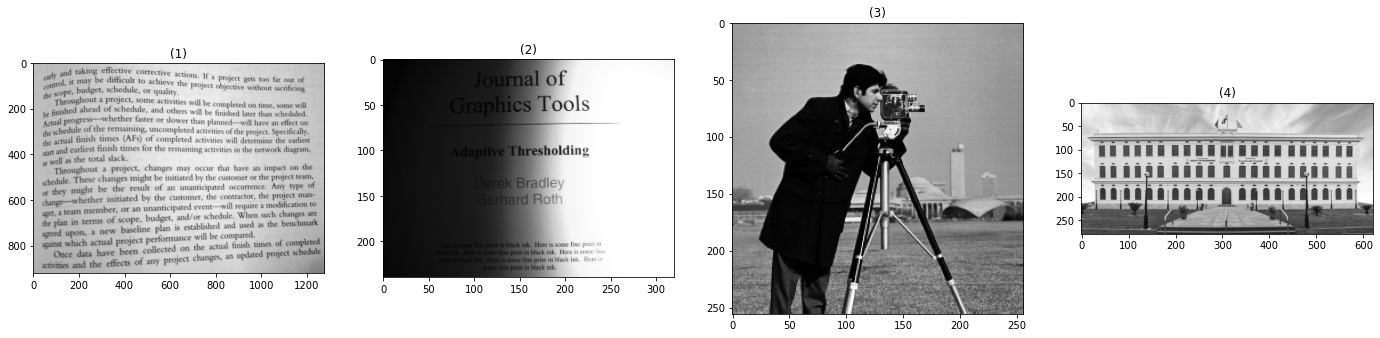

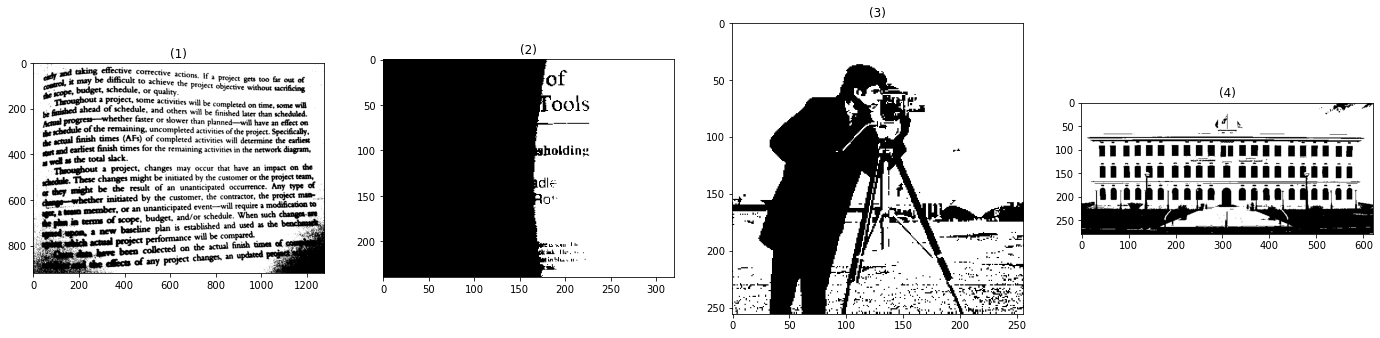

In [66]:
def get_hist(img):
    N, M = img.shape
    hist = np.zeros(256)
    for i in range(N):
        for j in range(M):
            hist[img[i][j]] += 1
    return hist

def get_thresh(hist, i, j):
    thresh = 0
    total = 0
    for i in range(i, j):
        thresh = thresh + i*hist[i]
        total = total + hist[i]
    if total == 0:
        thresh = 0
    else:
        thresh = thresh/total
    return np.round(thresh)

def global_thresh(img):
    # Convert the image to Unit8
    img = np.copy(img).astype(np.uint8)
    # Get counts array that contains the number of pixels in each grey-level
    hist = get_hist(img)
    # Get initial threshold by getting the average mean of the pixels’ grey-level
    prev_thresh = get_thresh(hist, 0, len(hist))

    thresh = 256
    # Get the two weighted averages (means)
    while thresh != prev_thresh:
        # One for the lower pixels (have gray level less than Tinit)
        left = get_thresh(hist, 0, int(prev_thresh))
        # The other for the higher pixels (have gray level more than Tinit)
        right = get_thresh(hist, int(prev_thresh), len(hist))
        if thresh != 256:
            prev_thresh = thresh
        # Update the New threshold to be the average of the two means
        thresh = (right+left)/2
        # Repeat threshold saturates
        
    return prev_thresh

book1 = rgb2gray(io.imread('book1.png'))*255
book = rgb2gray(io.imread('book.png'))
cameraman = rgb2gray(io.imread('cameraman.png'))
cufe = rgb2gray(io.imread('cufe.png'))*255
show_images([book1, book, cameraman, cufe])

book1_thresh = global_thresh(book1)
book_thresh = global_thresh(book)
cameraman_thresh = global_thresh(cameraman)
cufe_thresh = global_thresh(cufe)

bin_book1 = 1.0*(book1 > book1_thresh)
bin_book = 1.0*(book > book_thresh)
bin_cameraman = 1.0*(cameraman > cameraman_thresh)
bin_cufe = 1.0*(cufe > cufe_thresh)
show_images([bin_book1, bin_book, bin_cameraman, bin_cufe])


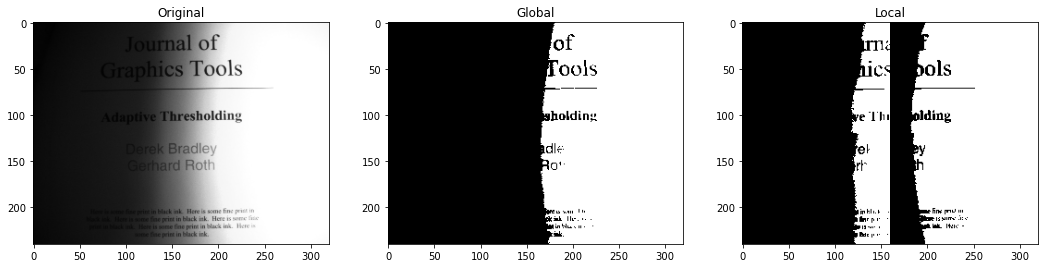

In [80]:
img = rgb2gray(io.imread('book.png'))
N, M = img.shape
mid_x, mid_y = N//2, M//2
mid_x = mid_x
mid_y = mid_y
# N = 200
# M = 400
first_q = book[0:mid_x, 0:mid_y]
second_q = book[mid_x:N, 0:mid_y]
third_q = book[0:mid_x, mid_y:M]
fourth_q = book[mid_x:N, mid_y:M]

first = global_thresh(first_q)
second = global_thresh(second_q)
third = global_thresh(third_q)
fourth = global_thresh(fourth_q)
img_thresh = global_thresh(img)

first_q = 1.0 * (first_q > first)
second_q = 1.0 * (second_q > second)
third_q = 1.0 * (third_q > third)
fourth_q = 1.0 * (fourth_q > fourth)
all_img = 1.0 * (img > img_thresh)

local = np.zeros((N, M))
local[0:mid_x, 0:mid_y] = first_q
local[mid_x:N, 0:mid_y] = second_q
local[0:mid_x, mid_y:M] = third_q
local[mid_x:N, mid_y:M] = fourth_q

show_images([book, all_img, local], ['Original', 'Global', 'Local'])


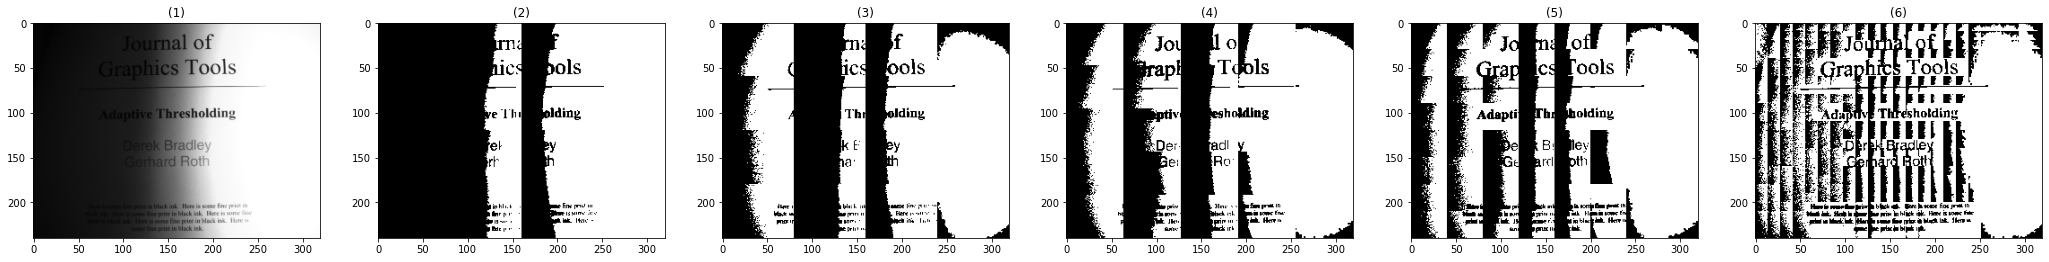

In [90]:
def local_thresh(img, n):
    img = np.copy(img).astype(np.uint8)
    step = int(np.sqrt(n))
    x = img.shape[0]//step
    y = img.shape[1]//step
    x_indices = [0]
    y_indices = [0]
    for i in range(step-1):
        x_indices.append(x_indices[len(x_indices)-1]+x)
        y_indices.append(y_indices[len(y_indices)-1]+y)
    x_indices.append(img.shape[0])
    y_indices.append(img.shape[1])
    output = np.zeros(img.shape)
    for i in range(len(x_indices)-1):
        for j in range(len(y_indices)-1):
            thresh = global_thresh(np.copy(img[x_indices[i]:x_indices[i+1], y_indices[j]:y_indices[j+1]]))
            output[x_indices[i]:x_indices[i+1], y_indices[j]:y_indices[j+1]] = 1.0 * np.copy(img[x_indices[i]:x_indices[i+1], y_indices[j]:y_indices[j+1]]) > thresh
    return output

img = rgb2gray(io.imread('book.png'))
res4 = local_thresh(img, 4)
res16 = local_thresh(img, 16)
res25 = local_thresh(img, 25)
res64 = local_thresh(img, 64)
res100 = local_thresh(img, 512)
show_images([img, res4, res16, res25, res64, res100])